In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

In [2]:
# Defined Variables
# properties of light source
ps = 1e12  # photons/second
wo = 0.009  # cm
ho = 0.15  # cm
brightness = ps/(wo*ho*4*np.pi)
# properties of monochromator
mono_focal = 8.  # cm
sm = (4*np.pi)/(16*mono_focal**2)
print sm
hs = 0.09  # cm
ws = 0.004  # cm
# create array 'xo', position of object
xo = np.linspace(25, 100, 500)  # cm

0.0122718463031


In [3]:
# use lens equation to calculate xi
lens_diameter = 8.  # cm
lens_focal = 20.  # cm
xi = 1./((1/lens_focal)-(1/xo))
# Solid angle of the image
si = (4*np.pi)/(16*(xi/lens_diameter)**2)
# Magnification
M = xi/xo

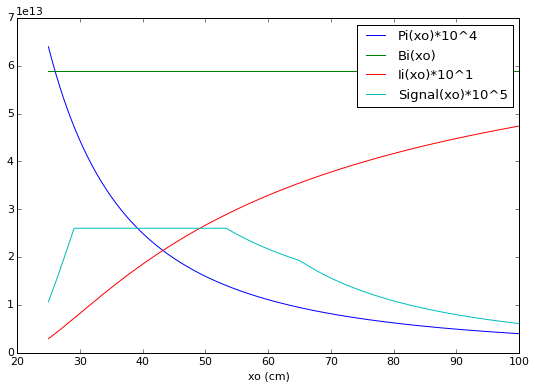

In [4]:
# solid angle (omega) object
so = si*(M**2)
# Power
pi = ps*so/(4*np.pi)
# graph xo vs pi
plt.plot(xo, pi*1e4)
plt.xlabel('xo (cm)')
#plt.ylabel('pi')
plt.grid()

# Brightness
bi = np.full(500,brightness)
# graph xo vs bi
plt.plot(xo, bi)
plt.xlabel('xo (cm)')
plt.grid()

# Area of Object
ao = wo*ho
# Intensity
ii = si*ps/(4*ao*np.pi)
# graph xo vs ii
plt.plot(xo, ii*1e1)
plt.xlabel('xo (cm)')
plt.grid()

# limiting area
# use minimum function to find element-wise minimum between hi and hs
# height and width of the image
hi = M*ho
wi = M*wo
h_limiting = np.minimum(hi, hs)
w_limiting = np.minimum(wi, ws)
la = h_limiting*w_limiting
lsa = np.minimum(si,sm)
# Signal
signal = bi*la*lsa
# graph xo vs signal
plt.plot(xo, signal*1e5)
plt.xlabel('xo (cm)')
plt.grid() 

# legend
plt.legend(['Pi(xo)*10^4', 'Bi(xo)', 'Ii(xo)*10^1','Signal(xo)*10^5'])

In [5]:
ind = np.argwhere(signal == np.amax(signal))
x_max_ind = np.amax(ind)
x_min_ind = np.amin(ind)
print xo[x_max_ind]
print xo[x_min_ind]

53.2565130261
29.2084168337


##2
What are the conditions for the heights, widths, and solid angles that give the maximum signal?

The height and width of the image should be larger than the monochromator slit, so in this case, $0.09$ cm height and $0.004$ cm respectively, or $x_o < 53.2$ cm. The solid angle should be minimized, so it must be smaller than the solid angle of the monochromator, which in this case is close to $0.0123$ cm, or $x_o > 29.2$ cm.

##3
Describe what happens to the size of the power, intensity, and brightness of the image at the monochromator's entrance slit as $x_o$ increases. Do they increase, decrease, or stay the same? Explain why they have that behavior.

The power decreases as xo increases because as we move the source futher away, the solid angle of the object decreases i.e. less of the source photons hit the lens. The intensity increases with $x_o$ because the image area decreases, as can be seen in the equation $I_i = \frac{\Omega_o P_o}{4 \pi A_i}$ . The brightness remains constant because it is a only a function of the object properties, with no dependence on $x_o$.

##4
Describe what happens to the size of the image, the position of the image, the size of the solid angle associated with the image at the monochromator's enterance slit, and the distance between the source and the monochromator as $x_o$ increases. Do they increase, decrease, or stay the same?

As $x_o$ increases, the size of the image is smaller, and it's position is further from the lens. The image solid angle increases with increasing $x_o$. Since we are moving the source to increase $x_o$, the distance between the source and the monochromator increases.

##5
From your graph in question 1, describe what happens to the signal as xo changes and explain why the signal changes in the way that it does. Could you get more signal by changing the lens? Prove it.

The signal line shape is initially controlled by the solid angle of the image, and thus the signal increases with $x_o$. It flatlines when the solid angle of the monochromator becomes limiting(i.e. it is smaller than the solid angle of the image). Initially the area is controlled by the slit width and height, which are constant, so this is a constant (horizontal) contribution. But as $x_o$ increases and the image gets smaller, one dimension of the image area becomes smaller than the slit, and thus the signal starts to be dependent on $x_o$ as the image shrinks. When the second image dimension also becomes smaller than the slit, the slope of the graph increases because now both dimensions are dependent on $x_o$.
    Because the maximum of the signal is a cut-off defined by the monochromator parameters, we cannot increase the maximum signal by changing the lens. Below I have run the signal graph again with changes in the lens parameters to demonstrate this point.

260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
260416666.667
Max Signal Values for varying lens diameter and focal length


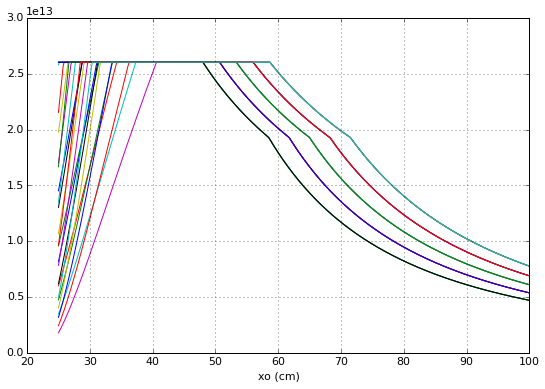

In [6]:
for n in xrange(6,11):
    for m in xrange(18,23):
        # use lens equation to calculate xi
        lens_diameter = float(n)  # cm
        lens_focal = float(m)  # cm
        xi = 1./((1/lens_focal)-(1/xo))
        # Solid angle of the image
        si = (4*np.pi)/(16*(xi/lens_diameter)**2)
        # Magnification
        M = xi/xo

        # Brightness
        bi = np.full(500,brightness)
        
        hi = M*ho
        wi = M*wo
        h_limiting = np.minimum(hi, hs)
        w_limiting = np.minimum(wi, ws)
        la = h_limiting*w_limiting
        lsa = np.minimum(si,sm)
        # Signal
        signal = bi*la*lsa
        # graph xo vs signal
        plt.plot(xo, signal*1e5)
        plt.xlabel('xo (cm)')
        plt.grid() 

        print np.amax(signal)
    
print "Max Signal Values for varying lens diameter and focal length"